In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
insurance_data=pd.read_csv('/content/insurance.csv')

In [38]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
insurance_data.shape

(1338, 7)

In [40]:
#getting some information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical datasets

*   Sex

*   Smoker
*   Region





In [41]:
#checking for missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [42]:
#statistical measures
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


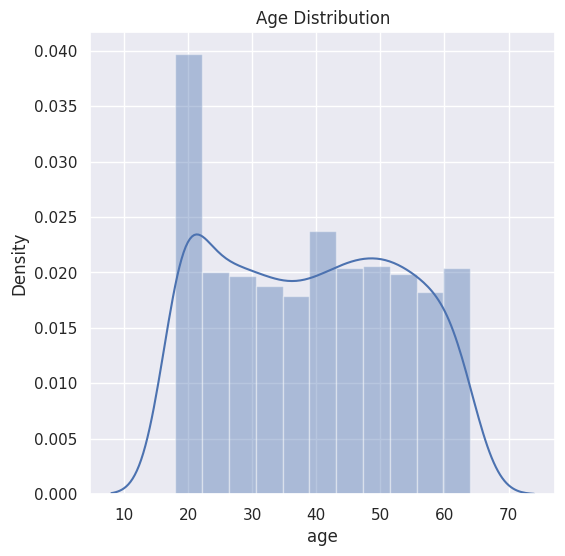

In [43]:
#distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])#distribution plot of the data
plt.title('Age Distribution')
plt.show()

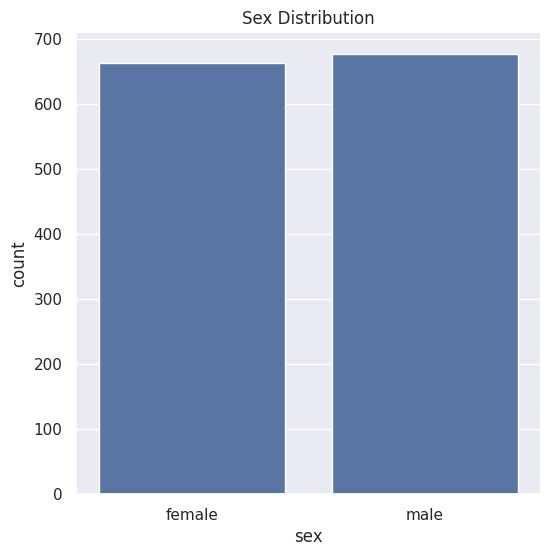

In [44]:
#count plot of gender column as it is not a numerical value
#we cannot use the distribution plot feature ...we go for count plot
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [45]:
#value count for sex column
insurance_data.sex.value_counts()

,count
sex,
male,676
female,662


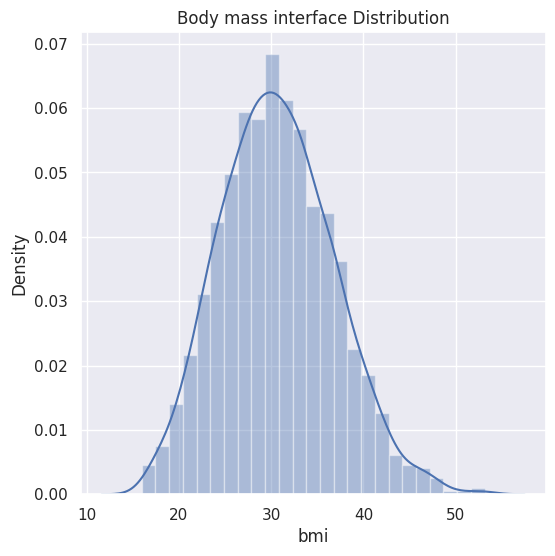

In [46]:
#distribution of bmi values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])#distribution plot of the data
plt.title('Body mass interface Distribution')
plt.show()

Normal BMI range --->18.5 to 24.9

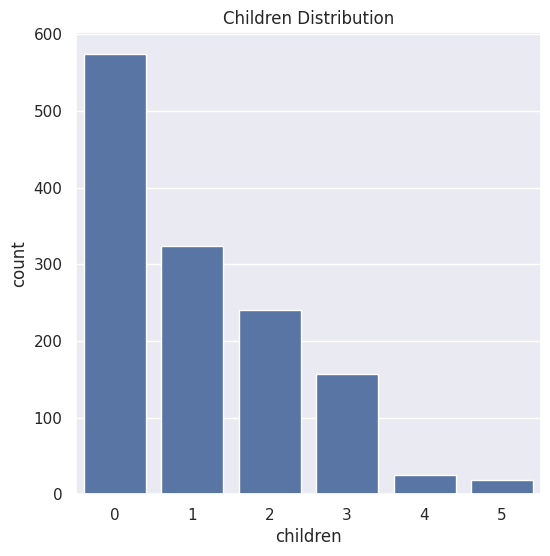

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children Distribution')
plt.show()

In [48]:
insurance_data.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


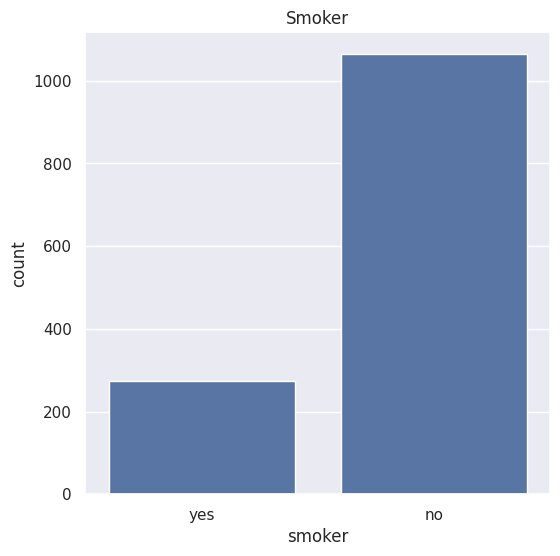

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')
plt.show()

In [50]:
insurance_data.smoker.value_counts()

,count
smoker,
no,1064
yes,274


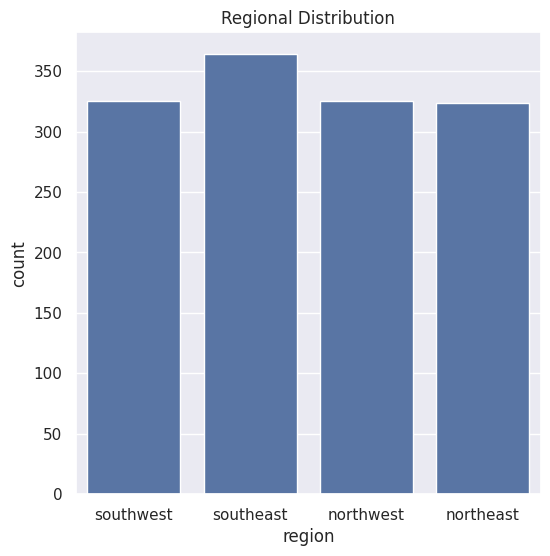

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Regional Distribution')
plt.show()

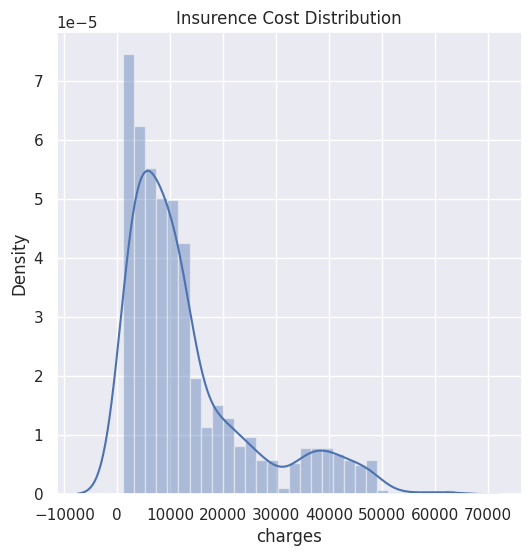

In [52]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])#distribution plot of the data
plt.title('Insurence Cost Distribution')
plt.show()

Encoding categorical features

In [54]:
#encoding the sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
#encoding the smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding the region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [56]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [57]:
#spilitting the features and the target
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [58]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [59]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [60]:
#spitting the data into trainig data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model traning

In [63]:
#loading the linear Regression function
regressor=LinearRegression()

In [64]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [65]:
#prediction of training data
training_data_prediction=regressor.predict(X_train)

In [66]:
#R square value
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [67]:
r2_train

0.751505643411174

In [68]:
test_data_prediction=regressor.predict(X_test)

In [69]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [70]:
r2_test

0.7447273869684076

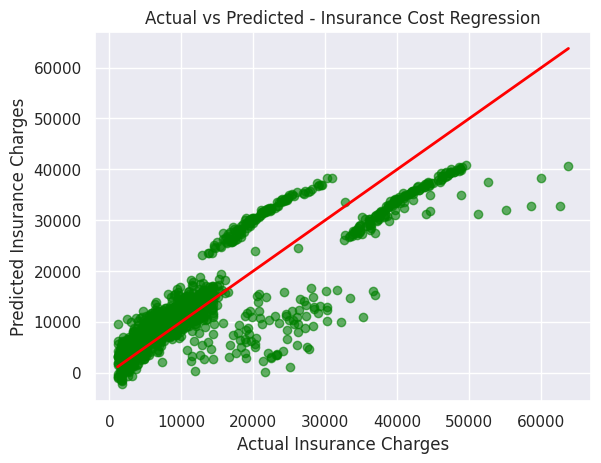

In [71]:
# Predictions
y_pred = regressor.predict(X)

plt.scatter(Y, y_pred, color="green", alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color="red", linewidth=2)  # reference line

plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted - Insurance Cost Regression")
plt.show()


In [73]:
input_data=(19,1,27.9,0,0,1)
#changing the input data which is tuple to a numpy array
input_data_as_numpy=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print("the insurence cost is :",prediction[0])

[25597.73941347]
the insurence cost is : 25597.73941346843
